In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import shapiro

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [106]:
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


1-age: 개인의 나이를 나타냅니다.

2-job: 개인의 직업이나 직무를 설명합니다.

3-marital: 그 사람의 결혼 상태를 나타냅니다(예: 'married', 'single', 'divorced').

4-education: 개인의 교육 수준을 나타냅니다(예: 초등, 중등, 고등).

5-default: 해당 개인의 기본 신용이 있는지 여부를 나타냅니다('예', '아니요' 또는 '알 수 없음').

6-balance: 개인이 보유한 자산을 나타냅니다.

7-housing: 해당 개인이 주택 대출을 받았는지 여부를 표시합니다('예', '아니요' 또는 '알 수 없음').

8-loan: 개인 대출이 있는지 여부를 나타냅니다('예', '아니요' 또는 '알 수 없음').

9-contact: 개인에게 연락하는 데 사용되는 통신 방법을 설명합니다(예: '휴대폰', '전화').

10-day: 마지막 접촉이 발생한 요일을 나타냅니다.

11-month: 마지막 접촉이 발생한 달을 나타냅니다.

12-duration: 마지막 접촉 기간을 초 단위로 나타냅니다.

13-campagin: 이 캠페인 동안 이루어진 접촉 수를 나타냅니다.

14-pdays: 해당 사람에게 마지막으로 연락한 이후의 일수를 설명하며, 이전에 연락하지 않은 경우 -1을 나타냅니다.

15-previous: 이 캠페인 이전에 이루어진 접촉 수를 나타냅니다.

16-poutcome: 이전 마케팅 캠페인의 결과를 나타냅니다.

17-deposit: 정기예금 가입 여부('예' 또는 '아니요')을 나타내는 대상 변수입니다.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
print("job column:", df['job'].unique())
print("martial column:", df['marital'].unique())
print("education column:", df['education'].unique())
print("housing column:", df['housing'].unique())
print("loan column:",df['loan'].unique())
print("contact column:", df['contact'].unique())
print("poutcome column:", df['poutcome'].unique())

job column: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
martial column: ['married' 'single' 'divorced']
education column: ['secondary' 'tertiary' 'primary' 'unknown']
housing column: ['yes' 'no']
loan column: ['no' 'yes']
contact column: ['unknown' 'cellular' 'telephone']
poutcome column: ['unknown' 'other' 'failure' 'success']


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


## Data Preprocessing

In [107]:
# 연령대별 범주 추가

bins = [10, 20, 30, 40, 50, 60, 70, 80, 100]  # 연령대의 구간 설정
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상']  # 각 연령대에 대한 라벨

df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,AgeGroup
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50대
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50대
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40대
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50대
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,30대
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,30대
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,30대
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,40대


## AgeGroup별 각 데이터 분석

### AgeGroup별 deposit 유무 분석

In [89]:
# AgeGroup와 가입 승인 유무(deposit)와의 상관관계 검증을 위한 카이제곱 검정

# 분할표 생성
contingency_table = pd.crosstab(df['AgeGroup'], df['deposit'])

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 통계량:", chi2)
print("P-value:", p_value)

# 유의수준 0.05에서의 검정
alpha = 0.05
if p_value < alpha:
    print("카이제곱 검정 결과: Category1과 Category2 간에는 통계적으로 유의미한 관계가 있습니다.")
else:
    print("카이제곱 검정 결과: Category1과 Category2 간에는 통계적으로 유의미한 관계가 없습니다.")

카이제곱 통계량: 468.6599470992772
P-value: 4.3593041788922496e-97
카이제곱 검정 결과: Category1과 Category2 간에는 통계적으로 유의미한 관계가 있습니다.


In [90]:
# 연령대별 정기 예금 보험 가입 승인 정도 분석

age_deposit = df.groupby(['AgeGroup'])['deposit'].value_counts().unstack()
age_deposit

deposit,no,yes
AgeGroup,,
10대,3,18
20대,620,910
30대,2405,1913
40대,1565,1063
50대,1100,785
60대,119,365
70대,44,180
80대 이상,17,55


In [91]:
age_deposit_total = age_deposit.sum(axis=1)  # 각 그룹의 총 빈도
age_percentage = age_deposit.divide(age_deposit_total, axis=0) * 100

print("그룹별 빈도:")
print(age_deposit)
print("\n전체에서의 퍼센트:")
print(age_percentage)

그룹별 빈도:
deposit     no   yes
AgeGroup            
10대          3    18
20대        620   910
30대       2405  1913
40대       1565  1063
50대       1100   785
60대        119   365
70대         44   180
80대 이상      17    55

전체에서의 퍼센트:
deposit          no        yes
AgeGroup                      
10대       14.285714  85.714286
20대       40.522876  59.477124
30대       55.697082  44.302918
40대       59.550989  40.449011
50대       58.355438  41.644562
60대       24.586777  75.413223
70대       19.642857  80.357143
80대 이상    23.611111  76.388889


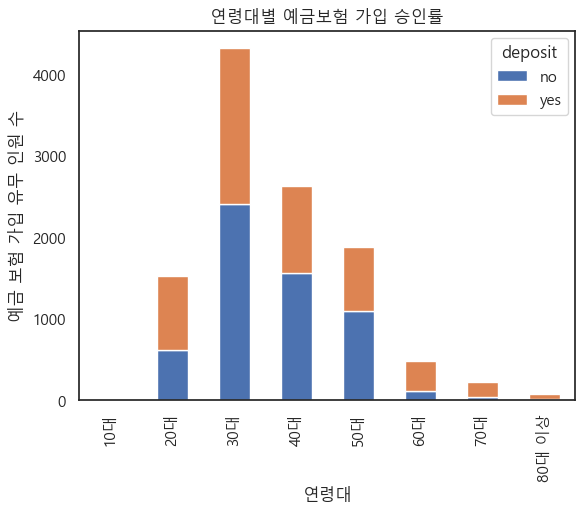

In [92]:
age_deposit.plot(kind='bar', stacked=True)
plt.title('연령대별 예금보험 가입 승인률')
plt.xlabel('연령대')
plt.ylabel('예금 보험 가입 유무 인원 수')
plt.show()

### AgeGroup별 balance 분석

In [114]:
# balance 데이터의 정규성을 확인하기 위해 콜모고로프-스미르노프 검정 수행
# shapiro test의 경우 표본이 큰 경우 적합하지 않기 때문
from scipy.stats import kstest

statistic, p_value = kstest(df['balance'], 'norm')

# 결과 출력
print(f"Statistic: {statistic}, p-value: {p_value}")

# p-value를 통해 귀무가설을 평가
alpha = 0.05
if p_value > alpha:   # 유의수준 0.05보다 크면 귀무가설을 기각하지 못하므로 정규분포한다고 볼 수 있음
    print("귀무가설을 기각할 수 없으므로 데이터는 정규 분포를 따른다고 할 수 있습니다.")
else:
    print("귀무가설을 기각하므로 데이터는 정규 분포를 따른다고 할 수 없습니다.")

Statistic: 0.8611299442905344, p-value: 0.0
귀무가설을 기각하므로 데이터는 정규 분포를 따른다고 할 수 없습니다.


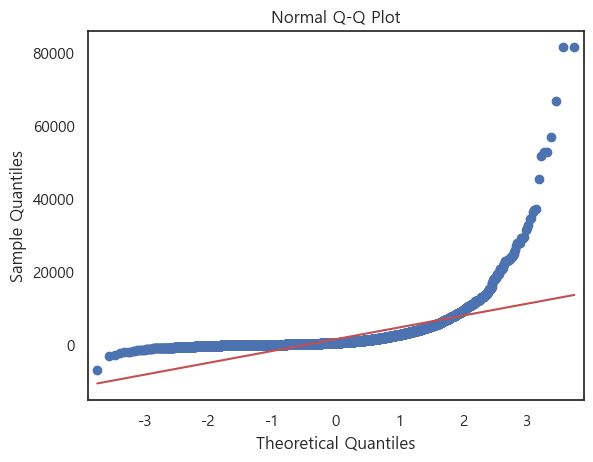

In [109]:
# QQ 플롯을 그려서 balance 데이터의 정규성 정도를 시각화
sm.qqplot(df['balance'], line='s')  # 's'는 직선을 의미합니다.

# 그래프 제목과 축 레이블 설정
plt.title("Normal Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# 그래프 표시
plt.show()

(array([8.673e+03, 2.296e+03, 1.360e+02, 3.700e+01, 1.200e+01, 1.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([-6847. ,  1958.1, 10763.2, 19568.3, 28373.4, 37178.5, 45983.6,
        54788.7, 63593.8, 72398.9, 81204. ]),
 <BarContainer object of 10 artists>)

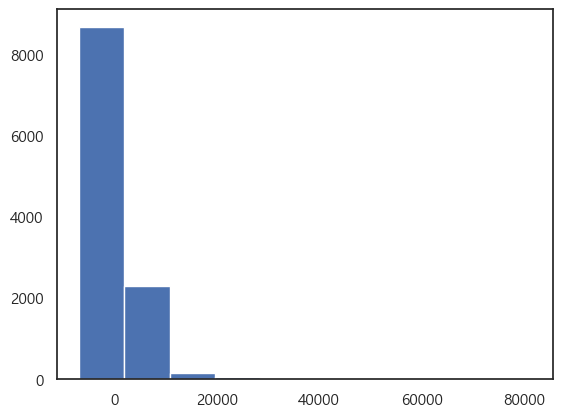

In [108]:
plt.hist(df['balance'])

In [116]:
from scipy.stats import skew, kurtosis

# 왜도 및 첨도 계산
skewness = skew(df['balance'])
kurt = kurtosis(df['balance'])

# 결과 출력
print("왜도:", skewness)
print("첨도:", kurt)

왜도: 8.223513810011928
첨도: 126.80394496305712


In [144]:
# AgeGroup와 balance 사이의 상관계수 확인

from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(df['balance'], pd.to_numeric(df['AgeGroup'].str.extract('(\d+)')[0]))
correlation_coefficient

0.11287530423825845

balance 데이터의 경우 정규성도 띄고 있지 않고 왜도와 첨도도 매우 뫂은 수치로 나타나기 때문에 비모수적 검증 방법인 Kruskal-Wallis 검정을 통해 
AgeGroup와 balance 간의 통계적 검정 수행

In [138]:
money_data_10s = df[['balance']][df['AgeGroup'] == '10대']
money_data_20s = df[['balance']][df['AgeGroup'] == '20대']
money_data_30s = df[['balance']][df['AgeGroup'] == '30대']
money_data_40s = df[['balance']][df['AgeGroup'] == '40대']
money_data_50s = df[['balance']][df['AgeGroup'] == '50대']
money_data_60s = df[['balance']][df['AgeGroup'] == '60대']
money_data_70s = df[['balance']][df['AgeGroup'] == '70대']
money_data_80s = df[['balance']][df['AgeGroup'] == '80대 이상']

statistic, p_value = stats.kruskal(
    money_data_10s, money_data_20s, money_data_30s, money_data_40s, money_data_50s,money_data_60s,money_data_70s,money_data_80s
)

# 결과 출력
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

# P-value가 유의수준보다 작으면 차이가 있다고 판단할 수 있음
if p_value < 0.05:
    print("연령대 별로 가진 돈의 양에 통계적으로 유의한 차이가 있다.")
else:
    print("연령대 별로 가진 돈의 양에 통계적으로 유의한 차이가 없다.")


Kruskal-Wallis Statistic: [211.99647965]
P-value: [3.29219893e-42]
연령대 별로 가진 돈의 양에 통계적으로 유의한 차이가 있다.


In [139]:
# 위 코드에 대한 최적화 버전

# 연령대 별로 데이터 그룹화
age_groups = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상']
money_data_by_age = [df.loc[df['AgeGroup'] == age, 'balance'] for age in age_groups]

# Kruskal-Wallis 검정 수행
statistic, p_value = stats.kruskal(*money_data_by_age)

# 결과 출력
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

# P-value가 유의수준보다 작으면 차이가 있다고 판단할 수 있음
if p_value < 0.05:
    print("연령대 별로 가진 돈의 양에 통계적으로 유의한 차이가 있다.")
else:
    print("연령대 별로 가진 돈의 양에 통계적으로 유의한 차이가 없다.")

Kruskal-Wallis Statistic: 211.99647964820488
P-value: 3.292198928135184e-42
연령대 별로 가진 돈의 양에 통계적으로 유의한 차이가 있다.


In [141]:
# 위 가설검정에 대한 근거를 확보하고자 AgeGroup별 평균 balance값을 확인

# 연령대별 평균 보유 자산 정도

age_balance = df.groupby(['AgeGroup'])['balance'].mean().reset_index()
age_balance

,AgeGroup,balance
0,10대,265.571429
1,20대,1183.981699
2,30대,1350.981010
3,40대,1483.557458
4,50대,1798.213263
5,60대,2481.710744
6,70대,2761.611607
7,80대 이상,4205.166667


In [145]:
# 연령대와 평균 자산 규모 사이의 상관계수 확인

from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(age_balance['balance'], pd.to_numeric(age_balance['AgeGroup'].str.extract('(\d+)')[0]))
correlation_coefficient


0.9533167070789503

Text(0.5, 1.0, '연령대에 따른 보유 자산 정도')

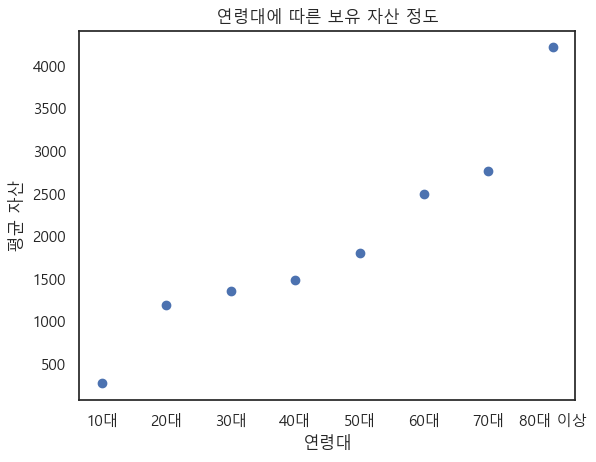

In [146]:
x = age_balance['AgeGroup']
y = age_balance['balance']

plt.scatter(x,y)
plt.xlabel("연령대")
plt.ylabel('평균 자산')
plt.title('연령대에 따른 보유 자산 정도')

### AgeGroup별 martial 분석

## education에 대한 데이터 분석

In [17]:
edu_deposit = df.groupby(['education'])['deposit'].value_counts().unstack()
edu_deposit

deposit,no,yes
education,,
primary,909,591
secondary,3026,2450
tertiary,1693,1996
unknown,245,252


In [18]:
edu_deposit_total = edu_deposit.sum(axis=1)
edu_percentage = edu_deposit.divide(edu_deposit_total, axis=0) * 100

print("그룹별 빈도:")
print(edu_deposit)
print("\n전체에서의 퍼센트:")
print(edu_percentage)


그룹별 빈도:
deposit      no   yes
education            
primary     909   591
secondary  3026  2450
tertiary   1693  1996
unknown     245   252

전체에서의 퍼센트:
deposit           no        yes
education                      
primary    60.600000  39.400000
secondary  55.259313  44.740687
tertiary   45.893196  54.106804
unknown    49.295775  50.704225


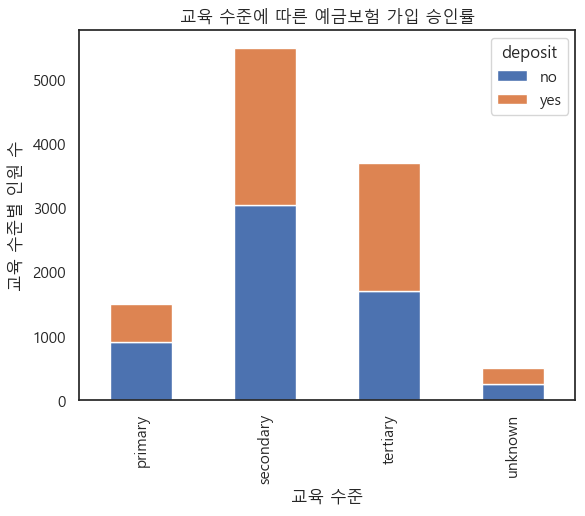

In [19]:
edu_deposit.plot(kind='bar', stacked=True)
plt.title('교육 수준에 따른 예금보험 가입 승인률')
plt.xlabel('교육 수준')
plt.ylabel('교육 수준별 인원 수')
plt.show()

In [20]:
mean_balance = df.groupby(['education'])['balance'].mean().reset_index()
mean_balance

,education,balance
0,primary,1523.031333
1,secondary,1296.480278
2,tertiary,1845.869070
3,unknown,1746.605634


Text(0.5, 0, '교육 수준')

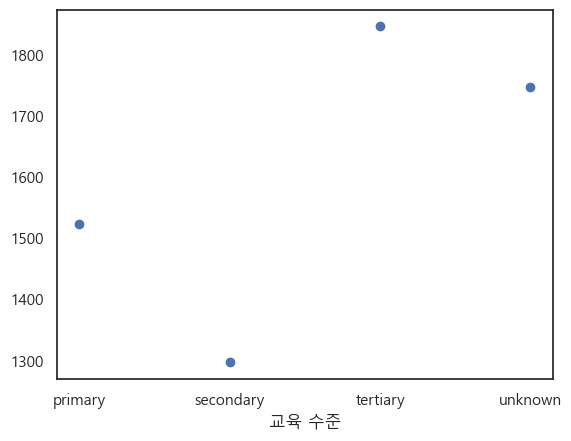

In [21]:
x = mean_balance['education']
y = mean_balance['balance']

plt.scatter(x,y)
plt.xlabel('교육 수준')